In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# import dataset
data = pd.read_csv('heart.csv');

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Check if exists null values
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

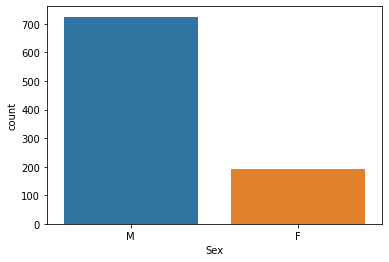

In [7]:
data['Sex'].value_counts()
sns.countplot(data=data, x='Sex')

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

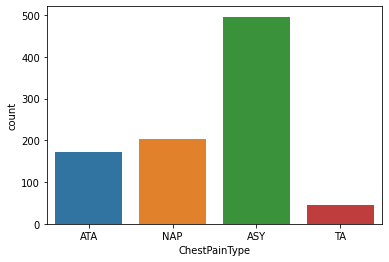

In [8]:
# show diagrams by criteria

data['ChestPainType'].value_counts()
sns.countplot(data=data, x='ChestPainType')

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

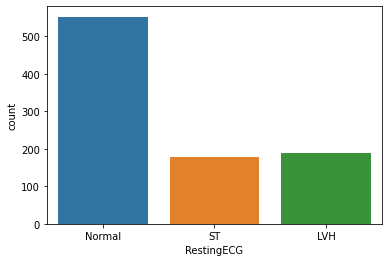

In [9]:
data['RestingECG'].value_counts()
sns.countplot(data=data, x='RestingECG')

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

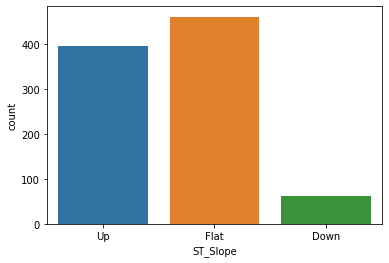

In [10]:
data['ST_Slope'].value_counts()
sns.countplot(data=data, x='ST_Slope')

In [11]:
# Split Data into train,test
data = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

In [12]:
# Normalization Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [13]:
scaler_train = scaler.transform(x_train)
scaler_test = scaler.transform(x_test)

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

Lr_model = LogisticRegression()
Lr_model.fit(scaler_train, y_train)

LogisticRegression()

In [15]:
y_pred = Lr_model.predict(scaler_test)

D:\Programming\Python\inteligent_system_laborators\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


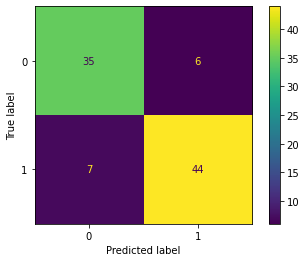

In [16]:
plot_confusion_matrix(Lr_model, scaler_test, y_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.86      0.87        51

    accuracy                           0.86        92
   macro avg       0.86      0.86      0.86        92
weighted avg       0.86      0.86      0.86        92



In [18]:
# KNN
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

test_error_rate = []
for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaler_train, y_train)
    y_p_test = knn_model.predict(scaler_test)
    test_error = 1 - accuracy_score(y_test, y_p_test)
    test_error_rate.append(test_error)

In [19]:
test_error_rate

[0.17391304347826086,
 0.2065217391304348,
 0.13043478260869568,
 0.14130434782608692,
 0.13043478260869568,
 0.14130434782608692,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.14130434782608692,
 0.13043478260869568,
 0.14130434782608692,
 0.14130434782608692,
 0.14130434782608692,
 0.15217391304347827,
 0.14130434782608692,
 0.14130434782608692,
 0.13043478260869568,
 0.14130434782608692,
 0.15217391304347827,
 0.15217391304347827,
 0.14130434782608692,
 0.14130434782608692,
 0.14130434782608692,
 0.14130434782608692,
 0.14130434782608692]

Text(0, 0.5, 'Error')

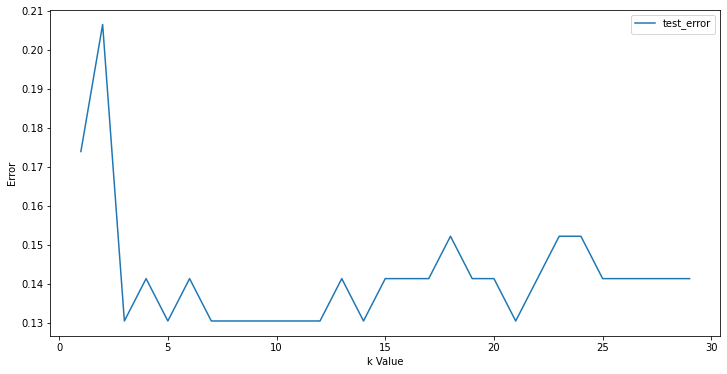

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), test_error_rate, label='test_error')
plt.legend()
plt.xlabel('k Value')
plt.ylabel('Error')

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(scaler_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred = knn_model.predict(scaler_test)

D:\Programming\Python\inteligent_system_laborators\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


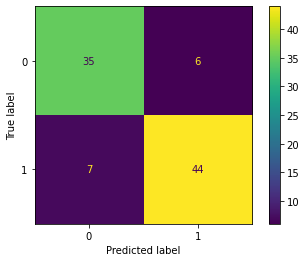

In [23]:
plot_confusion_matrix(Lr_model, scaler_test, y_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.91      0.84      0.88        51

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100)

In [26]:
RF.fit(scaler_train, y_train)

RandomForestClassifier()

D:\Programming\Python\inteligent_system_laborators\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


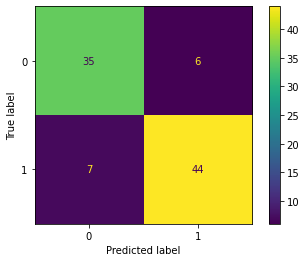

In [27]:
plot_confusion_matrix(Lr_model, scaler_test, y_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.91      0.84      0.88        51

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



In [29]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


def train_using_gini(scaler_train, y_train):
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(scaler_train, y_train)
    return clf_gini


def tarin_using_entropy(scaler_train, y_train):
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(scaler_train, y_train)
    return clf_entropy


def prediction(scaler_test, clf_object):
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(scaler_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred


def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))

    print("Accuracy : ",
          accuracy_score(y_test, y_pred) * 100)

    print("Report : ",
          classification_report(y_test, y_pred))


clf_gini = train_using_gini(scaler_train, y_train)
clf_entropy = tarin_using_entropy(scaler_train, y_train)

y_pred_gini = prediction(x_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Predicted values:
[0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0
 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0]
Confusion Matrix:  [[33  8]
 [ 8 43]]
Accuracy :  82.6086956521739
Report :                precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        51

    accuracy                           0.83        92
   macro avg       0.82      0.82      0.82        92
weighted avg       0.83      0.83      0.83        92



D:\Programming\Python\inteligent_system_laborators\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [30]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)

nb_model

GaussianNB()

In [31]:
y_pred = nb_model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.90      0.86      0.88        51

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92

